<a href="https://colab.research.google.com/github/DmitriiDenisov/research_oversampling/blob/master/Research_gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.
- One random point
- 2D plane

In [0]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [0]:
# Generates random point in rectangle [xy_min; xy_max]
def generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20]):
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
    return data

# Returns directional vector
def get_vector_two_points(two_points):
    return two_points[1] - two_points[0]

In [3]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 8.90002973 11.97649685]
 [ 7.51787964 11.37055498]]
[-1.38215009 -0.60594187]


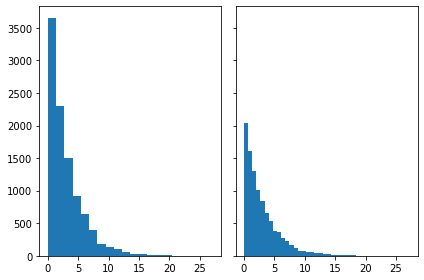

In [4]:
# JUST CHECKING how Gamma dist is look like

N_points = 100000
n_bins = 20

shape, scale = 1., 3.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(s, bins=n_bins)
axs[1].hist(s, bins=2*n_bins)
plt.show()

In [0]:
# Generates normilized Gamma distributed value
def generate_gamma():
    shape, scale = 1., 3.
    s = np.random.gamma(shape, scale, 1)[0]
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [0]:
gamma_coeff = generate_gamma()

In [0]:
# Generates new point on line between two initial points
def generate_point_on_line(start_point, v, gamma_coeff):
    return start_point + v * gamma_coeff

In [0]:
generated_point = generate_point_on_line(two_points[0], v, gamma_coeff)

In [9]:
# For visualazion:
initial_points_and_generated = np.concatenate((two_points, generated_point[np.newaxis, :]), axis=0)
initial_points_and_generated

array([[ 8.90002973, 11.97649685],
       [ 7.51787964, 11.37055498],
       [ 8.42865315, 11.76984288]])

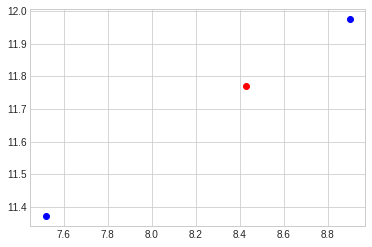

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_point[np.newaxis, :]))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');

## 2.
- Multiple Random points
- 2D plane

In [0]:
NUM_RAND_POINTS = 20

In [12]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 1.33287196  5.15325927]
 [ 8.46815662 15.4483668 ]]
[ 7.13528466 10.29510753]


In [0]:
gamma_coeff = generate_gamma()

generated_points = generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

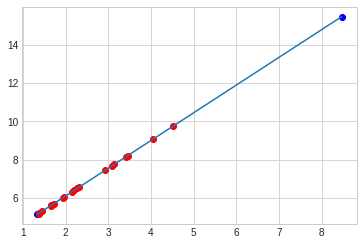

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');
plt.plot(initial_x, initial_y, '-');

In [15]:
generated_points

array([[2.27124767, 6.50718968],
       [2.92215855, 7.44635298],
       [3.09076375, 7.6896241 ],
       [1.97326918, 6.07725301],
       [3.40883144, 8.14854637],
       [4.05049959, 9.07437385],
       [1.64988329, 5.61065739],
       [2.14559401, 6.32589096],
       [1.68474487, 5.66095724],
       [2.19801929, 6.4015325 ],
       [1.71766217, 5.70845178],
       [4.51736537, 9.74798866],
       [3.45341754, 8.21287719],
       [3.13793703, 7.75768782],
       [2.31223223, 6.56632404],
       [1.66804142, 5.63685674],
       [1.93122081, 6.01658374],
       [1.3758582 , 5.21528174],
       [1.43875497, 5.30603202],
       [1.36550081, 5.20033764]])

In [16]:
two_points

array([[ 1.33287196,  5.15325927],
       [ 8.46815662, 15.4483668 ]])

## 3.
- One Random point
- n dimentional space

In [0]:
# Generates n random points in hypercube [xy_min; xy_max]
def generate_random_point_nd(num_points=2, n=10, min_=0, max_=10):
    xy_min = [min_] * n
    xy_max = [max_] * n
    data = np.random.uniform(low=xy_min, high=xy_max, size=(num_points, n))
    return data

In [18]:
two_points_nd = generate_random_point_nd(num_points=2, n=10)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == 10
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[1.43287593 1.42287985 2.70128969 2.3885992  7.30266028 2.00548201
  5.53421717 9.79696535 2.22718915 1.66839033]
 [5.16023034 6.97909553 2.32623234 1.01255511 0.12335941 4.06848149
  5.44117817 8.12605399 6.00744648 9.97007753]]
[ 3.72735441  5.55621568 -0.37505735 -1.37604409 -7.17930087  2.06299948
 -0.093039   -1.67091136  3.78025733  8.3016872 ]


In [0]:
gamma_coeff = generate_gamma()

In [20]:
generated_point = generate_point_on_line(two_points_nd[0], v, gamma_coeff)
generated_point

array([1.45472367, 1.45544738, 2.69909131, 2.38053357, 7.26057909,
       2.0175742 , 5.53367182, 9.78717137, 2.24934698, 1.71705033])

In [0]:
def test_points_on_line(p1, p2, list_p3, tol=10):
    # Calculate two vectors and check if they are collinear
    if len(list_p3.shape) == 1:
        list_p3 = list_p3[np.newaxis, :]
    vec_1 = p2 - p1
    for p3 in list_p3:
        vec_2 = (p3 - p1) / vec_1
        # take unique values
        unique_arr = np.unique(vec_2[~np.isnan(vec_2)].round(decimals=tol))
        if len(unique_arr) > 1:
          return False
        # Check that if nan then there were two zeros
        idx = np.where(~np.isfinite(vec_2))[0]
        if idx.size:
          if not (all((p3 - p1)[idx] == vec_1[idx]) and all(vec_1[idx] == 0)):
            return False
        return True
    return True

In [0]:
# Testing
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_point)

## 4.
- Multiple Random points
- n dimentional space

In [0]:
NUM_RAND_POINTS = 20
N_FEATURES = 10

In [24]:
two_points_nd = generate_random_point_nd(num_points=2, n=N_FEATURES)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == N_FEATURES
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[4.25826561 7.72238658 5.44896457 0.04144692 5.2080384  5.75125568
  4.01652807 2.59312298 2.88724486 7.6530562 ]
 [8.57863332 2.19164086 1.84770264 5.87376988 5.481186   0.53064601
  9.83290663 9.12561525 1.49606362 1.86893705]]
[ 4.32036771 -5.53074572 -3.60126193  5.83232296  0.2731476  -5.22060966
  5.81637856  6.53249227 -1.39118123 -5.78411914]


In [0]:
gamma_coeff = generate_gamma()

generated_points = generate_point_on_line(two_points_nd[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_point_on_line(two_points_nd[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)
    
assert generated_points.shape[0] == NUM_RAND_POINTS
assert generated_points.shape[1] == N_FEATURES

In [0]:
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_points)

## 5.
- Generalization of the approach for n minority points for n dimentional space

In [0]:
NUM_RAND_POINTS = 20
NUM_MINORITY_POINTS = 5
N_FEATURES = 10
NUM_TO_ADD = 15

In [0]:
minority_points_nd = generate_random_point_nd(num_points=NUM_MINORITY_POINTS, n=N_FEATURES)
assert minority_points_nd.shape[0] == NUM_MINORITY_POINTS
assert minority_points_nd.shape[1] == N_FEATURES
# print(two_points_nd)
# get vector for these two points
# v = get_vector_two_points(N_points_nd)
# print(v)

In [0]:
def generate_points_for_n_minority(minority_points, num_to_add):
  n_features = minority_points.shape[1]
  dict_ans = defaultdict(lambda: np.array([]).reshape(0, n_features))
  # Choose random pairs with repetition:
  all_comb = np.array(list(itertools.combinations(range(len(minority_points)), r=2)))
  rand_idx = np.random.choice(range(len(all_comb)), num_to_add, replace=True)
  assert rand_idx.shape == (num_to_add, )
  # print(rand_idx)
  # print(all_comb)
  all_comb = all_comb[rand_idx]
  # assert random_choice_minority.shape[0] == num_to_add and random_choice_minority.shape[1] == 2
  for i, (idx1, idx2) in enumerate(all_comb):
    v = get_vector_two_points([minority_points[idx1], minority_points[idx2]])
    gamma_coeff = generate_gamma()
    generated_point = generate_point_on_line(minority_points[idx1], v, gamma_coeff)
    minority_points = np.concatenate((minority_points, generated_point[np.newaxis, :]), axis=0)
    dict_ans[tuple(all_comb[i])] = np.vstack([dict_ans[tuple(all_comb[i])], generated_point])
    
  return minority_points, dict_ans # return concatenated initial+generated points and dict for testing


In [0]:
minority_points, dict_ans = generate_points_for_n_minority(minority_points_nd, num_to_add=NUM_TO_ADD)

In [31]:
minority_points_nd

array([[8.21272553, 8.7954291 , 4.01445098, 4.30023468, 9.2450305 ,
        3.63574891, 3.24097874, 4.76955787, 3.61936473, 4.74818475],
       [3.78427579, 7.41175345, 8.31213665, 9.106186  , 9.52470116,
        9.95292382, 8.72459883, 4.5638328 , 3.58858012, 8.75697123],
       [9.23698142, 4.21517012, 3.03407723, 7.05936613, 0.22114541,
        4.87796755, 9.9105929 , 2.62745136, 7.45150344, 6.16882592],
       [1.90684175, 3.09003266, 9.43535455, 3.72477063, 3.00993102,
        7.22444113, 9.16597785, 4.19686572, 3.92134011, 5.60356613],
       [3.3303605 , 9.49305905, 5.37289249, 7.37275909, 3.92453142,
        8.98120986, 4.66472651, 2.78915299, 0.06703109, 8.27524451]])

In [32]:
minority_points

array([[8.21272553, 8.7954291 , 4.01445098, 4.30023468, 9.2450305 ,
        3.63574891, 3.24097874, 4.76955787, 3.61936473, 4.74818475],
       [3.78427579, 7.41175345, 8.31213665, 9.106186  , 9.52470116,
        9.95292382, 8.72459883, 4.5638328 , 3.58858012, 8.75697123],
       [9.23698142, 4.21517012, 3.03407723, 7.05936613, 0.22114541,
        4.87796755, 9.9105929 , 2.62745136, 7.45150344, 6.16882592],
       [1.90684175, 3.09003266, 9.43535455, 3.72477063, 3.00993102,
        7.22444113, 9.16597785, 4.19686572, 3.92134011, 5.60356613],
       [3.3303605 , 9.49305905, 5.37289249, 7.37275909, 3.92453142,
        8.98120986, 4.66472651, 2.78915299, 0.06703109, 8.27524451],
       [1.94945026, 3.28168691, 9.31375766, 3.83396157, 3.03730668,
        7.27702442, 9.03124719, 4.15473031, 3.80597362, 5.68353433],
       [3.62909364, 7.05453508, 8.40497792, 8.66137698, 8.98621299,
        9.72739696, 8.76108168, 4.53350059, 3.6160849 , 8.49632176],
       [8.94420576, 4.47678119, 3.1500061

In [0]:
# testing:
n_points = 0
for key, points in dict_ans.items():
  for point in points:
    n_points+=1
    assert test_points_on_line(minority_points_nd[key[1]], minority_points_nd[key[0]], point)
assert n_points == NUM_TO_ADD

## 6.
- Gamma distribution with negative values

In [0]:
NUM_POINTS = 50

In [35]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 3.8192731  13.15627656]
 [ 1.48776769 17.98575905]]
[-2.33150542  4.82948249]


In [0]:
def max_pdf_gamma(k, theta):
  return (k-1) * theta

def generate_gamma_negative():
    k, theta = 3, 2.1
    s = np.random.gamma(k, theta, 1)[0]
    s = s - max_pdf_gamma(k, theta) # shift by X axis
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [0]:
gamma_coeff = generate_gamma_negative()

generated_points = generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_POINTS - 1):
    gamma_coeff = generate_gamma_negative()
    generated_points = np.concatenate((generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

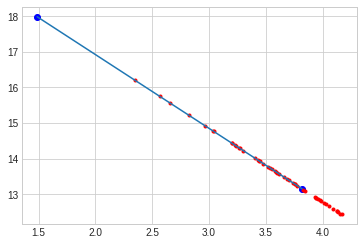

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, '.', color='red');
plt.plot(initial_x, initial_y, '-');

## 7. Apply to real datasets

In [39]:
!pip install imbalanced-learn==0.5

In [40]:
import imblearn
imblearn.__version__

Using TensorFlow backend.


'0.5.0'

In [0]:
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import StandardScaler
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
import pandas as pd

In [0]:
def get_dataset_pd(name):
  X = pd.DataFrame(fetch_datasets()[name]['data'])
  target = pd.DataFrame(fetch_datasets()[name]['target']).replace(-1, 0)
  assert target.shape[0] == X.shape[0]
  return X, target

In [0]:
def aug_train(X_temp):
  # Подавать внутрь датафрейм X_temp с колонкой y
  num_zeros = X_temp[X_temp['y'] == 0].to_numpy().shape[0]
  num_ones = X_temp[X_temp['y'] == 1].to_numpy().shape[0]

  num_add = num_zeros - num_ones
  minority_points = X_temp[X_temp['y'] == 1].drop('y', 1).to_numpy()

  minority_points, dict_ans = generate_points_for_n_minority(minority_points, num_add)
  assert minority_points.shape[0] == X_temp[X_temp['y'] == 1].to_numpy().shape[0] + num_add 
  assert num_zeros == minority_points.shape[0]

  # testing:
  initial_rows = X_temp[X_temp['y'] == 1].to_numpy().shape[0]
  n_points = 0
  for key, points in dict_ans.items():
    for point in points:
      n_points+=1
      assert key[1] <= initial_rows and key[0] <= initial_rows
      assert test_points_on_line(minority_points[key[1]], minority_points[key[0]], point)
  assert n_points == num_add
  assert np.all(np.equal(minority_points[:initial_rows], X_temp[X_temp['y'] == 1].drop('y', 1).to_numpy()))

  X_aug = np.concatenate((X_temp[X_temp['y'] == 0].drop('y', 1).to_numpy(), minority_points), axis=0)
  y_aug = np.array([0] * num_zeros + [1] * num_zeros)
  assert X_aug.shape[0] == 2 * num_zeros
  assert y_aug.shape[0] == X_aug.shape[0]

  df_new = pd.DataFrame(X_aug)
  df_new['y'] = y_aug

  return df_new

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [81]:
# 1. Get dataset:
X, y = get_dataset_pd('abalone')

# 2. Split on test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # random_state=42

# 3. Fit:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# 4. Predict and metrics:
y_pred = clf.predict(X_test)
print(f1_score(y_test.to_numpy().flatten(), y_pred))
print(precision_score(y_test.to_numpy().flatten(), y_pred))
print(recall_score(y_test.to_numpy().flatten(), y_pred)) 

0.13043478260869565
0.2857142857142857
0.08450704225352113


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [82]:
y_pred.sum()

21

In [83]:
# 1. Get dataset:
X, y = get_dataset_pd('abalone')

# 2. Split on test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # random_state=42

# 3. Augment train part by generating new minority points
X_train['y'] = y_train
X_train_aug = aug_train(X_train)

# 4. Shuffle
X_train_aug = X_train_aug.sample(frac=1) # shuffle

# 5. Drop target from train
y_train_aug = X_train_aug['y']
X_train_aug = X_train_aug.drop('y', 1)

# 6. Fit:
clf = RandomForestClassifier()
clf.fit(X_train_aug, y_train_aug)

# 7. Predict and metrics:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred)) 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


0.34682080924855485
0.32967032967032966
0.36585365853658536


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
X_train

,0,1,2,3,4,5,6,7,8,9,y
1265,0.0,1.0,0.0,0.460,0.360,0.105,0.4660,0.2225,0.0990,0.1100,1
2001,0.0,1.0,0.0,0.360,0.270,0.085,0.2185,0.1065,0.0380,0.0620,0
600,0.0,1.0,0.0,0.535,0.420,0.145,0.9260,0.3980,0.1965,0.2500,0
1674,0.0,0.0,1.0,0.610,0.470,0.170,1.1185,0.5225,0.2405,0.3100,0
3966,0.0,1.0,0.0,0.295,0.220,0.065,0.1295,0.0520,0.0280,0.0350,0
...,...,...,...,...,...,...,...,...,...,...,...
2977,0.0,1.0,0.0,0.430,0.330,0.100,0.4490,0.2540,0.0825,0.0970,0
700,0.0,0.0,1.0,0.385,0.285,0.105,0.2905,0.1215,0.0685,0.0875,0
2343,0.0,1.0,0.0,0.170,0.125,0.055,0.0235,0.0090,0.0055,0.0080,0
1960,1.0,0.0,0.0,0.650,0.510,0.185,1.3750,0.5310,0.3840,0.3985,0


In [68]:
X_test

,0,1,2,3,4,5,6,7,8,9
331,1.0,0.0,0.0,0.400,0.325,0.120,0.3185,0.1340,0.0565,0.0950
4138,0.0,0.0,1.0,0.630,0.490,0.155,1.2290,0.5350,0.2900,0.3350
641,0.0,1.0,0.0,0.620,0.485,0.180,1.1785,0.4675,0.2655,0.3900
3473,0.0,1.0,0.0,0.210,0.150,0.055,0.0455,0.0200,0.0065,0.0130
1368,0.0,0.0,1.0,0.610,0.460,0.160,1.0000,0.4940,0.1970,0.2750
...,...,...,...,...,...,...,...,...,...,...
3632,0.0,1.0,0.0,0.300,0.225,0.075,0.1345,0.0570,0.0280,0.0440
2394,0.0,1.0,0.0,0.625,0.460,0.160,1.2395,0.5500,0.2730,0.3800
3981,0.0,0.0,1.0,0.565,0.455,0.150,0.9795,0.4440,0.2050,0.2750
821,0.0,1.0,0.0,0.370,0.275,0.140,0.2215,0.0970,0.0455,0.0615


In [57]:
X

,0,1,2,3,4,5,6,7,8,9,y
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...,...,...
4172,1.0,0.0,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,0.0,0.0,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0
4174,0.0,0.0,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4175,1.0,0.0,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [48]:
y_test.to_numpy().flatten() - y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:

df_new

NameError: ignored

In [0]:
X.shape